In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime as dt

import warnings
warnings.simplefilter("ignore")

In [97]:
df = pd.read_excel('Массив.xlsx', index_col=None, header=None) # читаем таблицу
df.columns = df.iloc[0] # первая строка - заголовок (параметром в функции read_excel не получается сразу задать заголовок, возможно из-за ошибок с библиотеками - не понимает некоторые символы)
df = df.iloc[1:] # удаляем первую строку - заголовки

In [98]:
# два одинаковых столбца ~"В каком районе находится место Вашей учебы/ работы?" (индексы 14 и 15)
# объединяю данные столбцы и удаляю лишние

df['В каком районе находится место Вашей учебы/ работы? (выберите из выпадающего списка, для поиска можно ввести первые буквы)'] = df.iloc[:, [14, 15]].bfill(1).iloc[:,0]
df.drop(df.columns[[14, 15]],axis = 1)

,В каком регионе Вы проживаете:,"Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?","Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?",Связана ли Ваша работа с постоянными разъездами?,"Вы совершали в последние несколько дней какие-либо поездки, если да, то в какой день?","Скажите, пожалуйста, сколько Вам полных лет?","И отметьте, пожалуйста, возрастную группу:","Отметьте, пожалуйста, Ваш пол:",В каком районе Московской области/ Новой Москвы Вы живете?,В каком округе Москвы Вы живете?,...,Выберите предпочтительный вариант,Выберите предпочтительный вариант,"Спасибо за ответы. Сейчас мы также предложим Вам на рассмотрение несколько вариантов, каждый из которых содержит два варианта маршрута – на индивидуальном или городском транспорте.",Выберите предпочтительный вариант,Выберите предпочтительный вариант,Выберите предпочтительный вариант,Выберите предпочтительный вариант,Выберите предпочтительный вариант,Выберите предпочтительный вариант,Ваше имя:
1,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,55,55-64,Мужчина,NaN,ЮАО,...,Платная дорога - 40 минут в пути и плата 100 р...,Бесплатная дорога - 70 минут в пути,NaN,Личный автомобиль – 1 час 10 минут в пути и пл...,Личный автомобиль – 1 час 20 минут в пути и пл...,Городской транспорт - 1 час в пути и плата 50 ...,Городской транспорт – 1 час в пути и плата 75 ...,Городской транспорт – 1 час в пути и плата 50 ...,Городской транспорт – 1 час 10 минут в пути и ...,Иван
2,В Московской области/ В Новой Москве,Да,Да,Нет,Суббота-Воскресенье,NaN,35-44,Мужчина,"Долгопрудный, Лобня, Химки",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,49,45-54,Мужчина,NaN,ЮАО,...,Бесплатная дорога - 60 минут в пути,Бесплатная дорога - 70 минут в пути,NaN,Городской транспорт - 50 минут в пути и плата ...,Городской транспорт – 1 час в пути и плата 75 ...,Городской транспорт - 1 час в пути и плата 50 ...,Городской транспорт – 1 час в пути и плата 75 ...,Городской транспорт – 1 час в пути и плата 50 ...,Городской транспорт – 1 час 10 минут в пути и ...,юрий
4,В Московской области/ В Новой Москве,Да,Да,Нет,Суббота-Воскресенье,NaN,35-44,Мужчина,"Долгопрудный, Лобня, Химки",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,37,35-44,Мужчина,NaN,ЮВАО,...,Бесплатная дорога - 60 минут в пути,Бесплатная дорога - 70 минут в пути,NaN,Личный автомобиль – 1 час 10 минут в пути и пл...,Городской транспорт – 1 час в пути и плата 75 ...,Городской транспорт - 1 час в пути и плата 50 ...,Городской транспорт – 1 час в пути и плата 75 ...,Городской транспорт – 1 час в пути и плата 50 ...,Городской транспорт – 1 час 10 минут в пути и ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,72,65 и старше,Мужчина,NaN,ЮЗАО,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Василий
997,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,28,25-34,Мужчина,NaN,ЦАО,...,Платная дорога - 40 минут в пути и плата 100 р...,Платная дорога - 40 минут в пути и плата 250 р...,NaN,Личный автомобиль – 1 час 10 минут в пути и пл...,Личный автомобиль – 1 час 20 минут в пути и пл...,Личный автомобиль – 50 минут в пути и плата 10...,Личный автомобиль – 1 час 10 минут в пути и пл...,Личный автомобиль – 1 час 20 минут в пути и пл...,Личный автомобиль – 1 час в пути и плата 800 р...,Саша
998,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,28,25-34,Мужчина,NaN,ЦАО,...,Платная дорога - 40 минут в пути и плата 100 р...,Платная дорога - 40 минут в пути и плата 250 р...,NaN,Личный автомобиль – 1 час 10 минут в пути и пл...,Личный автомобиль – 1 час 20 минут в пути и пл...,Городской транспорт - 1 час в пути и плата 50 ...,Городской транспорт – 1 час в пути и плата 75 ...,Личный автомобиль – 1 час 20 минут в пути и пл...,Городской транспорт – 1 час 10 минут в пути и ...,Максим
999,В Москве,Н/Д,Да,Нет,Понедельник-Четвер

In [99]:
# индекс начала блока опроса с дополнительными вопросами про перемещения

df.columns.get_loc('Давайте поговорим о Ваших перемещениях.   Перемещение – это абсолютно все поездки в любые места в течении дня – школу, магазин, работу, фитнес-клуб.  Если вы совершали поездку с пересадкой (например, сначала на автобусе, а потом на метро) – это одно перемещение.')

37

In [100]:
# индексы начал перемещений, кроме первого

list_col_index = [i for i, x in enumerate(df.columns.get_loc(next(e for e in list(df.filter(regex='на этом закончили свой день?').columns)))) if x]
list_col_index
# print(df.iloc[:, list_col_index], '\n', list_col_index)

[74, 106, 138, 170, 202]

In [101]:
# индексы столбцов о перемещениях "Какой был начальный пункт Вашего {{{первого}}} перемещения, откуда Вы отправились?"

# list_col_index_begin_point = [i for i, x in enumerate(df.columns.get_loc(next(e for e in list(df.filter(regex='перемещения, откуда Вы отправились?').columns)))) if x]
# list(df.filter(regex='перемещения, откуда Вы отправились?').columns)

In [102]:
# индексы начала блоков опросов ~"Итак, Ваше №-е перемещение началось из {индекс 39}"

list_col_index_first = []

for i in list(df.filter(regex='(?=[0-9].*INSERTANS)').columns):
    list_col_index_first.append(df.columns.get_loc(i))
#     print(list_col_index_first)
#     print(df.filter(regex='(?=[0-9].*INSERTANS)').columns)
    
print(df.filter(regex='(?=[0-9].*INSERTANS)').columns, '\n',
list_col_index_first)

Index(['Итак, Ваше 1-е перемещение началось из "{INSERTANS:753742X3403X150493}", верно?',
       'Итак, Ваше 2-е перемещение началось от "{INSERTANS:753742X3404X150497}"?',
       'Итак, Ваше 3-е перемещение началось от "{INSERTANS:753742X3405X150517}"?',
       'Итак, Ваше 4-е перемещение началось от "{INSERTANS:753742X3406X150530}"?',
       'Итак, Ваше 5-е перемещение началось от "{INSERTANS:753742X3407X150543}"?',
       'Итак, Ваше 6-е перемещение началось от "{INSERTANS:753742X3408X150556}"?'],
      dtype='object', name=0) 
 [47, 79, 111, 143, 175, 207]


In [501]:
# разделение дополнительных ответов по перемещениям на блоки - датафреймы

general_info = df.iloc[:, :37]
first_moving = df.iloc[:, 37:list_col_index[0]]
second_moving = df.iloc[:, list_col_index[0]:list_col_index[1]]
third_moving = df.iloc[:, list_col_index[1]:list_col_index[2]]
fourth_moving = df.iloc[:, list_col_index[2]:list_col_index[3]]
fifth_moving = df.iloc[:, list_col_index[3]:list_col_index[4]]
sixth_moving = df.iloc[:, list_col_index[4]:-15]
additional_info = df.iloc[:, -15:]

# замена значений из столбца AW -> AV; и замена значений в столбце AP (нет -> да). 
# видимо, пользователи неправильно указали в столбце AP место отправления

first_moving.iloc[:, 4] = np.where(first_moving.iloc[:, 11].notnull() == True, first_moving.iloc[:, 11], first_moving.iloc[:, 4])
first_moving.iloc[:, 10] = np.where(first_moving.iloc[:, 11].notnull() == True, 'Да', first_moving.iloc[:, 10])
first_moving = first_moving.drop(first_moving.columns[5], axis = 1) # удаляем лишний столбец с неинформативныи данными (индекс 5 в first_moving)
# first_moving[first_moving.columns[:12]]

In [502]:
# обработка данных о времени (часы:минуты) отправления/прибытия в first_moving
# индексы 5 и 6 - часы отправления/прибытия, индексы 7 и 8 - минуты отправления/прибытия

# first_moving.iloc[:, 7] = [ str(first_moving.iloc[i, 7]) + "0" if len(str(first_moving.iloc[i, 7])) == 1 else i for i in first_moving.iloc[:, 7]]

first_moving.iloc[:, 5] = np.where(first_moving.iloc[:, 5] > 23, 0, first_moving.iloc[:, 5])
first_moving.iloc[:, 6] = np.where(pd.to_numeric(first_moving.iloc[:, 6]) > 23, 0, first_moving.iloc[:, 6])

departure = pd.to_datetime(first_moving.iloc[:, 5].astype(str) + ':' + first_moving.iloc[:, 7].astype(str), format='%H:%M')
arrival = pd.to_datetime(first_moving.iloc[:, 6].astype(str) + ':' + first_moving.iloc[:, 8].astype(str), format='%H:%M')

from datetime import datetime as dt

departure = np.where((departure < arrival) == False, arrival, departure) # если пользователь указал, что время отправления позже, чем время прибытия, тогда обнуляем время для этой записи
arrival = np.array(arrival)

first_moving['Время, когда Вы вышли/ выехали из начального пункта 1-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + pd.to_datetime(departure).strftime("%H:%M"), format='%m/%d/%Y %H:%M')
first_moving['Время, когда добрались до конечного пункта 1-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + pd.to_datetime(arrival).strftime("%H:%M"), format='%m/%d/%Y %H:%M')
first_moving['Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)'] = pd.to_timedelta(first_moving.iloc[:,-1] - first_moving.iloc[:,-2]).dt.seconds / 60

# first_moving['Время, когда Вы вышли/ выехали из начального пункта 1-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + first_moving.iloc[:, 5].astype(str) + ':' + first_moving.iloc[:, 7].astype(str), format='%m/%d/%Y %H:%M')
# first_moving['Время, когда добрались до конечного пункта 1-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + first_moving.iloc[:, 6].astype(str) + ':' + first_moving.iloc[:, 8].astype(str), format='%m/%d/%Y %H:%M')
# # first_moving['Разница (в часах)'] = pd.to_timedelta(first_moving.iloc[:,-1] - first_moving.iloc[:,-2]).dt.hours
# first_moving['Разница (в минутах)'] = pd.to_timedelta(first_moving.iloc[:,-1] - first_moving.iloc[:,-2]).dt.seconds / 60
# first_moving

# first_moving.iloc[:,-1].sort_values(ascending=False)
first_moving

,"Давайте поговорим о Ваших перемещениях. Перемещение – это абсолютно все поездки в любые места в течении дня – школу, магазин, работу, фитнес-клуб. Если вы совершали поездку с пересадкой (например, сначала на автобусе, а потом на метро) – это одно перемещение.","Итак, сколько перемещений Вы совершили вчера? Сколько у Вас вчера было конечных пунктов? [Перемещений в день:]","Давайте вспомним последний день, когда Вы совершали перемещения по городу на городском или личном транспорте. Какой день это был? Укажите, пожалуйста, дату.",Сколько перемещений Вы совершили в этот день? Сколько у Вас было конечных пунктов в этот день? [Перемещений в день:],"Какой был начальный пункт Вашего первого перемещения, откуда Вы отправились?","Укажите, пожалуйста, данные Вашего первого перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [ЧАСЫ (Например, 8)][Время, когда Вы вышли/ выехали из начального пункта]","Укажите, пожалуйста, данные Вашего первого перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [ЧАСЫ (Например, 8)][Время, когда добрались до конечного пункта]","Укажите, пожалуйста, данные Вашего первого перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [МИНУТЫ (Например, 25)][Время, когда Вы вышли/ выехали из начального пункта]","Укажите, пожалуйста, данные Вашего первого перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [МИНУТЫ (Например, 25)][Время, когда добрались до конечного пункта]","Итак, Ваше 1-е перемещение началось из ""{INSERTANS:753742X3403X150493}"", верно?",Откуда началось Ваше 1-е перемещение?,Откуда началось Ваше 1-е перемещение? [Другое],"Скажите, пожалуйста, какова была цель Вашего первого перемещения, куда Вы направлялись?","Скажите, пожалуйста, какова была цель Вашего первого перемещения, куда Вы направлялись? [Другое]","Укажите, пожалуйста, начальный пункт этого передвижения (улицу и номер дома или населенный пункт, улицу).","Укажите, пожалуйста, конечный пункт этого передвижения (улицу и номер дома или населенный пункт, улицу).","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 1]","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 2]","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 3]","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 4]","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 5]","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 

In [426]:
first_moving.iloc[:,-1]

1        40.0
2       110.0
3         0.0
4       150.0
5        15.0
        ...  
996      36.0
997      65.0
998      20.0
999      80.0
1000    116.0
Name: Разница (в минутах), Length: 1000, dtype: float64

In [152]:
second_moving.iloc[:, 1] = np.where(second_moving.iloc[:, 1] > 23, 0, second_moving.iloc[:, 1])
second_moving.iloc[:, 2] = np.where(pd.to_numeric(second_moving.iloc[:, 2]) > 23, 0, second_moving.iloc[:, 2])

second_moving['Время, когда Вы вышли/ выехали из начального пункта 2-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + pd.DataFrame(np.where(second_moving.iloc[:, 1].notnull() == True, second_moving.iloc[:, 1], 0)).iloc[:, 0].astype(str) + ':' + pd.DataFrame(np.where(second_moving.iloc[:, 3].notnull() == True, second_moving.iloc[:, 3], 0)).iloc[:, 0].astype(str), format='%m/%d/%Y %H:%M')
second_moving['Время, когда добрались до конечного пункта 2-е перемещение'] = pd.to_datetime((pd.Timestamp.now().floor('d') - pd.Timedelta(1, unit='d')).strftime("%m/%d/%Y ") + pd.DataFrame(np.where(second_moving.iloc[:, 2].notnull() == True, second_moving.iloc[:, 2], 0)).iloc[:, 0].astype(str) + ':' + pd.DataFrame(np.where(second_moving.iloc[:, 4].notnull() == True, second_moving.iloc[:, 4], 0)).iloc[:, 0].astype(str), format='%m/%d/%Y %H:%M')
# second_moving.iloc[:,[1,2,3,4,-2,-1]]


,"Укажите, пожалуйста, данные Вашего второго перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [ЧАСЫ (Например, 8)][Время, когда Вы вышли/ выехали из начального пункта]","Укажите, пожалуйста, данные Вашего второго перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [ЧАСЫ (Например, 8)][Время, когда добрались до конечного пункта]","Укажите, пожалуйста, данные Вашего второго перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [МИНУТЫ (Например, 25)][Время, когда Вы вышли/ выехали из начального пункта]","Укажите, пожалуйста, данные Вашего второго перемещения. Эта информация будет использована в дальнейшем в обобщенном виде для улучшения транспортной системы города. [МИНУТЫ (Например, 25)][Время, когда добрались до конечного пункта]","Время, когда Вы вышли/ выехали из начального пункта 2-е перемещение","Время, когда добрались до конечного пункта 2-е перемещение"
1,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
2,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
3,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
4,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
5,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
...,...,...,...,...,...,...
996,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
997,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
998,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16
999,NaN,NaN,NaN,NaN,2024-03-16,2024-03-16


In [503]:
general_info = df.iloc[:, :37]
general_info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 37 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   В каком регионе Вы проживаете:                                                                                              1000 non-null   object
 1   Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?                       1000 non-null   object
 2   Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?    1000 non-null   object
 3   Связана ли Ваша работа с постоянными разъездами?                                                                            1000

In [504]:
general_info.sample()

,В каком регионе Вы проживаете:,"Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?","Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?",Связана ли Ваша работа с постоянными разъездами?,"Вы совершали в последние несколько дней какие-либо поездки, если да, то в какой день?","Скажите, пожалуйста, сколько Вам полных лет?","И отметьте, пожалуйста, возрастную группу:","Отметьте, пожалуйста, Ваш пол:",В каком районе Московской области/ Новой Москвы Вы живете?,В каком округе Москвы Вы живете?,В каком районе Москвы Вы живете?,Какая станция метро/МЦК/МЦД находится ближе всего к Вашему дому?,"Что из перечисленного лучше всего характеризует Ваш статус, отметьте пожалуйста один из пунктов?","Скажите, пожалуйста, где находится Ваше место работы/учебы?","В каком районе находится место Вашей учебы/ работы? (выберите из выпадающего списка, для поиска можно ввести первые буквы)","В каком районе находится место Вашей учебы/ работы? (выберите из выпадающего списка, для поиска можно ввести первые буквы)",Есть ли у Вас водительское удостоверение?,Есть ли у Вашей семьи автомобиль?,"Вы можете пользоваться автомобилем, принадлежащим Вашей семье?",Во время поездок по городу на автомобиле Вы предпочитаете: [Доезжать до места назначения на автомобиле],Во время поездок по городу на автомобиле Вы предпочитаете: [Использовать перехватывающие парковки],"Расскажите, какой основной вид транспорта у Вас для поездок в Москву?","Расскажите, какой основной вид транспорта у Вас для поездок в Москву? [Другое]","Вы указали, что основной вид транспорта – автомобиль. Подскажите, Вы на нём доезжаете?","Вы указали, что основной вид транспорта – автомобиль. Подскажите, Вы на нём доезжаете? [Другое]","Укажите, пожалуйста, название станции метро/железной дороги:","Укажите, пожалуйста, название станции метро/железной дороги: [Другое]","Укажите, пожалуйста, ближайшую станцию метро, ЖД","Укажите, пожалуйста, ближайшую станцию метро, ЖД [Другое]","Укажите, сколько минут в среднем занимает поиск свободного места на парковке?",За какое время Вы обычно добираетесь до места хранения автомобиля … [Часов],За какое время Вы обычно добираетесь до места хранения автомобиля … [Минут],Как часто Вы летом (с мая по август) ездили на дачу или загород?,На каком виде транспорта Вы обычно добираетесь на дачу или загород?,Сколько времени занимает у Вас в среднем дорога на дачу или за город? [Часов],Сколько времени занимает у Вас в среднем дорога на дачу или за город? [Минут],Какой вид транспорта Вы используете чаще всего для передвижений по городу?
770,В Москве,Н/Д,Да,Нет,Понедельник-Четверг,41,35-44,Мужчина,NaN,ЦАО,Внуково,Выхино,Владелец бизнеса,В Москве,Внуково,NaN,Нет,Нет,NaN,Н/Д,Н/Д,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Не езжу на дачу,NaN,NaN,NaN,NaN


In [505]:
# pd.options.display.max_columns = None
general_info.describe()

print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in general_info.columns.to_list():
    print('\033[91m'+ 'Признак "{}" имеет \033[1m\033[91m {} \033[0m\033[91m следующих уникальных значений:'.format(i, len(general_info[i].unique()))+'\033[0m')
    print(general_info[i].unique())
    print('Индекс столбца ', general_info.columns.get_loc(i))
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')

Уникальные значения

Признак "В каком регионе Вы проживаете:" имеет  2  следующих уникальных значений:
['В Москве' 'В Московской области/ В Новой Москве']
Индекс столбца  0
---------------------------------------------------------------------------------
Признак "Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?" имеет  3  следующих уникальных значений:
['Н/Д' 'Да' 'Нет']
Индекс столбца  1
---------------------------------------------------------------------------------
Признак "Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?" имеет  1  следующих уникальных значений:
['Да']
Индекс столбца  2
---------------------------------------------------------------------------------
Признак "Связана ли Ваша работа с постоянными разъездами?" имеет  1  следующих уникальных значений:
['Нет']
Индекс столбца  3
--------------------------------------------------------------------

In [506]:
# после осмотра и краткого ревью о данных можем удалить лишние пустые столбцы, не содержащие никакой полезной информации (все nan)

print("shape of data is", str(general_info.shape))
idx = np.r_[22, 24:29]
general_info.drop(general_info.columns[idx], 
         axis = 1, inplace = True)
print(general_info.columns)
print("shape of data is", str(general_info.shape))

shape of data is (1000, 37)
Index(['В каком регионе Вы проживаете:',
       'Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?',
       'Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?',
       'Связана ли Ваша работа с постоянными разъездами?',
       'Вы совершали в последние несколько дней какие-либо поездки, если да, то в какой день?',
       'Скажите, пожалуйста, сколько Вам полных лет?     ',
       'И отметьте, пожалуйста, возрастную группу:    ',
       'Отметьте, пожалуйста, Ваш пол:',
       'В каком районе Московской области/ Новой Москвы Вы живете?',
       'В каком округе Москвы Вы живете?', 'В каком районе Москвы Вы живете?',
       'Какая станция метро/МЦК/МЦД находится ближе всего к Вашему дому?',
       'Что из перечисленного лучше всего характеризует Ваш статус, отметьте пожалуйста один из пунктов?',
       'Скажите, пожалуйста, где находится Ва

In [507]:
percent_missing = round(general_info.isnull().sum(axis = 0) * 100/len(general_info), 2)
number_missing =  round(general_info.isnull().sum(axis = 0))
# index_column = pd.DataFrame(list(general_info.columns.get_loc(i) for i in general_info.columns.to_list()))

missing_vals_df = pd.concat([number_missing, percent_missing], axis = 1, ignore_index = True)
missing_vals_df.columns = ["количество пропущенных значений", "процент пропущенных значений"]
missing_vals_df

,количество пропущенных значений,процент пропущенных значений
0,,
В каком регионе Вы проживаете:,0,0.0
"Совершаете ли Вы регулярные поездки в Москву, в пределах МКАД (регулярно - от 1 раза в месяц и чаще)?",0,0.0
"Скажите, пожалуйста, Вы совершали в течении последней недели поездки из дома на индивидуальном или городском транспорте?",0,0.0
Связана ли Ваша работа с постоянными разъездами?,0,0.0
"Вы совершали в последние несколько дней какие-либо поездки, если да, то в какой день?",0,0.0
"Скажите, пожалуйста, сколько Вам полных лет?",167,16.7
"И отметьте, пожалуйста, возрастную группу:",0,0.0
"Отметьте, пожалуйста, Ваш пол:",0,0.0
В каком районе Московской области/ Новой Москвы Вы живете?,675,67.5


In [513]:
general_info_copy = general_info.copy()
first_moving_copy = first_moving.copy()

# pd.concat([df1, df2, df3, ...], axis=1, join='outer')
mean_time = pd.merge(general_info_copy.loc[:,['Есть ли у Вас водительское удостоверение?','Есть ли у Вашей семьи автомобиль?', 'Вы можете пользоваться автомобилем, принадлежащим Вашей семье?']],
         first_moving_copy.iloc[:,[16,-3,-2,-1]], left_on=None, left_index=True, right_index=True, how="left")
mean_time
(mean_time.iloc[:,[0,2,3,-1]].groupby([mean_time.columns[2], mean_time.columns[3]])[['Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)']].count()/mean_time.iloc[:,[-1]].count()*100).rename(columns={'Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)':'Время в пути (в минутах), %'})

0                                                                                                      Время в пути (в минутах), %
Вы можете пользоваться автомобилем, принадлежащ... Скажите, пожалуйста, какими видами транспорта В...                             
Да, без ограничений                                Автомобилем в качестве водителя                                            19.8
                                                   Автомобилем в качестве пассажира                                            1.5
                                                   Арендованным автомобилем                                                    0.3
                                                   Велосипедом, самокатом                                                      0.1
                                                   Маршрутным такси                                                            1.0
                                                   Метро                                                                      10.0
                                                   Обычной электричкой                                                         0.8
                                                   Пешком (не пользовался транспортом вообще)                                  2.6
                                                   Попутной машиной                                                            0.1
                                                   Рейсовым автобусом                                                          2.5
                                                   Такси                                                                       2.1
                                                   Трамваем                                                                    0.5
Да, после договоренности с другими членами семьи   Автомобилем в качестве водителя                                             4.8
                                                   Автомобилем в качестве пассажира                                            0.7
                                                   Велосипедом, самокатом                                                      0.2
                                                   Маршрутным такси                                                            0.3
                                                   Метро                                                                       1.4
                                                   Обычной электричкой                                                         0.3
                                                   Пешком (не пользовался транспортом вообще)                                  0.2
                                                   Попутной машиной                                                            0.2
                                                   Рейсовым автобусом                                                          1.9
                                                   Такси                                                                       0.4
                                                   Трамваем                                                                    0.2
Нет                                                Автомобилем в качестве пассажира                                            2.9
                                                   Велосипедом, самокатом                                                      0.3
                                                   Ласточкой                                                                   0.1
                                                   Маршрутным такси                                                            2.6
                                                   Метро                                                                       3.1
                                                   Обычной электричкой

In [573]:
mean_time.iloc[:,[0,2,3,-1]].groupby([mean_time.columns[3]])[['Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)']].mean()

,"Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)"
"Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 1]",
Автомобилем в качестве водителя,54.252000
Автомобилем в качестве пассажира,78.323077
Арендованным автомобилем,32.333333
"Велосипедом, самокатом",55.375000
Ласточкой,67.500000
Маршрутным такси,200.960000
Метро,91.787611
Обычной электричкой,115.640000
Пешком (не пользовался транспортом вообще),78.485714


In [572]:
pd.DataFrame(mean_time.iloc[:,[3]].groupby(mean_time.columns[3]).size()).rename(columns={0:'Количество'})

,Количество
"Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 1]",
Автомобилем в качестве водителя,250
Автомобилем в качестве пассажира,65
Арендованным автомобилем,18
"Велосипедом, самокатом",8
Ласточкой,2
Маршрутным такси,75
Метро,226
Обычной электричкой,25
Пешком (не пользовался транспортом вообще),70


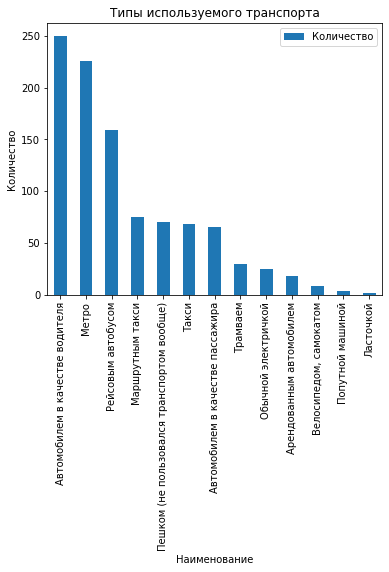

In [583]:
mean_time_chart = pd.DataFrame(mean_time.iloc[:,[3]].groupby(mean_time.columns[3]).size()).rename(columns={0:'Количество'}).sort_values('Количество', ascending=False)
mean_time_chart.plot(kind='bar', title='Типы используемого транспорта', ylabel='Количество',
         xlabel='Наименование', figsize=(6, 5))

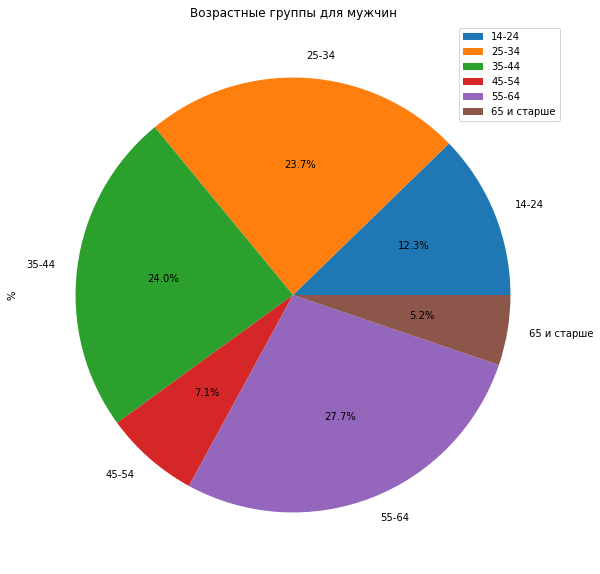

In [693]:
gender_vs_auto = pd.merge(general_info_copy.loc[:,['И отметьте, пожалуйста, возрастную группу:    ','Отметьте, пожалуйста, Ваш пол:','Есть ли у Вашей семьи автомобиль?', 'Вы можете пользоваться автомобилем, принадлежащим Вашей семье?']],
         first_moving_copy.iloc[:,[16,-3,-2,-1]], left_on=None, left_index=True, right_index=True, how="left")

# gender_vs_auto[:,[1]].groupby([gender_vs_auto.columns[1]]).count()

gender_vs_age = gender_vs_auto.groupby([gender_vs_auto.columns[1], gender_vs_auto.columns[0]])[[gender_vs_auto.columns[0], gender_vs_auto.columns[1]]].size().reset_index(name='count')
# gender_vs_age = gender_vs_age[gender_vs_age.columns[1] == 'Мужчина']
gender_vs_age_man = gender_vs_age[gender_vs_age.iloc[:,0] == 'Мужчина'].set_index(gender_vs_age_woman.iloc[:,1])
# gender_vs_age_man.index=[gender_vs_age_man[gender_vs_age_woman.iloc[:,1]]]

gender_vs_age_woman = gender_vs_age[gender_vs_age.iloc[:,0] == 'Женщина'].set_index(gender_vs_age_woman.iloc[:,1])
# gender_vs_age_woman.index=[gender_vs_age_woman[gender_vs_age_woman.iloc[:,1]]]

# plt.subplot(2, 2, 2)
gender_vs_age_man.iloc[:,[1,2]].plot.pie(y=gender_vs_age_man.columns[2], figsize=(10,10),autopct='%1.1f%%')
plt.title('Возрастные группы для мужчин')
plt.ylabel('%')
plt.show()
# plt.subplot(2, 2, 2)

# gender_vs_age_man.plot.pie(x=gender_vs_age_man.columns[2], figsize=(10,10),autopct='%1.1f%%')
# plot = 
# gender_vs_age_man.columns[2]


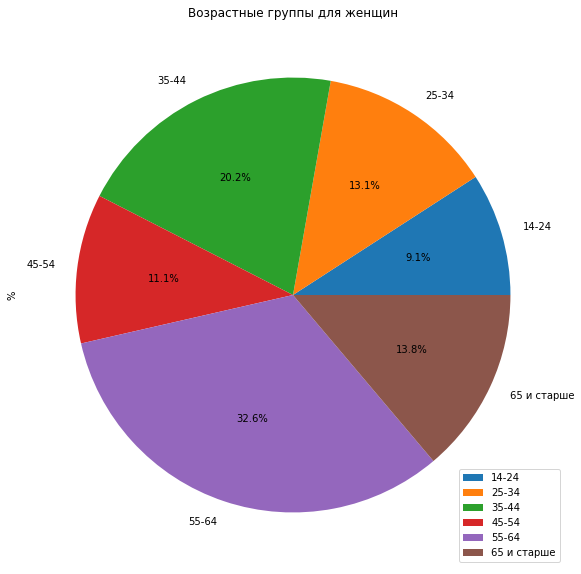

In [673]:
gender_vs_age_woman.iloc[:,[1,2]].plot.pie(y=gender_vs_age_woman.columns[2], figsize=(10,10),autopct='%1.1f%%')
plt.title('Возрастные группы для женщин')
plt.ylabel('%')
plt.show()

In [585]:
gender_vs_auto.

,"И отметьте, пожалуйста, возрастную группу:","Отметьте, пожалуйста, Ваш пол:",Есть ли у Вашей семьи автомобиль?,"Вы можете пользоваться автомобилем, принадлежащим Вашей семье?","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 1]","Время, когда Вы вышли/ выехали из начального пункта 1-е перемещение","Время, когда добрались до конечного пункта 1-е перемещение","Время в пути (1-е перемещение), т.е. разница м/ду временем начала/конца (в минутах)"
1,55-64,Мужчина,Да,"Да, без ограничений",Автомобилем в качестве водителя,2024-03-16 19:00:00,2024-03-16 19:40:00,40.0
2,35-44,Мужчина,Нет,NaN,Обычной электричкой,2024-03-16 07:10:00,2024-03-16 09:00:00,110.0
3,45-54,Мужчина,Да,"Да, без ограничений",Автомобилем в качестве водителя,2024-03-16 01:40:00,2024-03-16 01:40:00,0.0
4,35-44,Мужчина,Нет,NaN,Пешком (не пользовался транспортом вообще),2024-03-16 07:00:00,2024-03-16 09:30:00,150.0
5,35-44,Мужчина,Да,"Да, без ограничений",Автомобилем в качестве водителя,2024-03-16 17:30:00,2024-03-16 17:45:00,15.0
...,...,...,...,...,...,...,...,...
996,65 и старше,Мужчина,Нет,NaN,Рейсовым автобусом,2024-03-16 09:00:00,2024-03-16 09:36:00,36.0
997,25-34,Мужчина,Да,"Да, после договоренности с другими членами семьи",Метро,2024-03-16 17:10:00,2024-03-16 18:15:00,65.0
998,25-34,Мужчина,Да,"Да, без ограничений",Автомобилем в качестве водителя,2024-03-16 09:00:00,2024-03-16 09:20:00,20.0
999,25-34,Мужчина,Нет,NaN,Метро,2024-03-16 08:20:00,2024-03-16 09:40:00,80.0


In [692]:
gender_vs_auto_gender = gender_vs_auto.groupby([gender_vs_auto.columns[1], gender_vs_auto.columns[4]])[[gender_vs_auto.columns[1], gender_vs_auto.columns[4]]].size().reset_index(name='count')
gender_vs_auto_gender

,"Отметьте, пожалуйста, Ваш пол:","Скажите, пожалуйста, какими видами транспорта Вы пользовались при совершении 1-го перемещения? (перетащите в соседний столбец) Если Вы пользовались несколькими видами транспорта, то назовите виды транспорта в порядке их использования: на чем передвигались сначала, на чем – потом. [Ранг 1]",count
0,Женщина,Автомобилем в качестве водителя,64
1,Женщина,Автомобилем в качестве пассажира,37
2,Женщина,Арендованным автомобилем,8
3,Женщина,"Велосипедом, самокатом",2
4,Женщина,Маршрутным такси,33
5,Женщина,Метро,76
6,Женщина,Обычной электричкой,9
7,Женщина,Пешком (не пользовался транспортом вообще),36
8,Женщина,Попутной машиной,3
9,Женщина,Рейсовым автобусом,83


In [712]:
gender_vs_auto_man = gender_vs_auto_gender[gender_vs_auto_gender.iloc[:,0] == 'Мужчина'].set_index(gender_vs_auto_man.iloc[:,1])
gender_vs_auto_woman = gender_vs_auto_gender[gender_vs_auto_gender.iloc[:,0] == 'Женщина'].set_index(gender_vs_auto_woman.iloc[:,1])

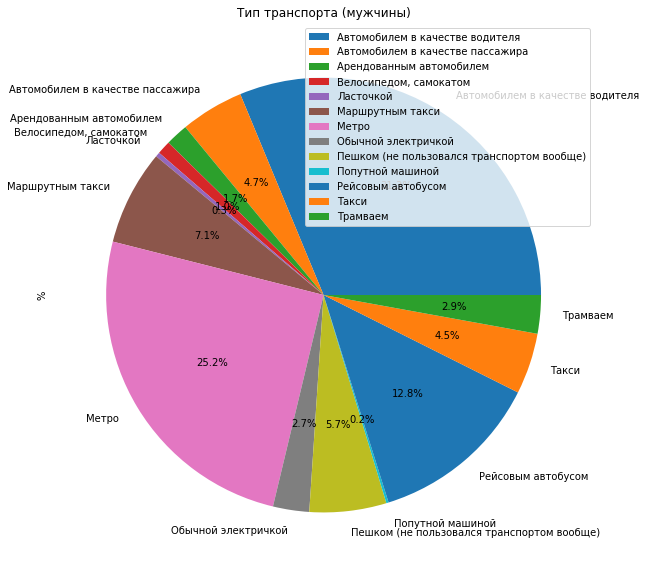

In [715]:
gender_vs_auto_man.iloc[:,[1,2]].plot.pie(y=gender_vs_auto_man.columns[2], figsize=(10,10),autopct='%1.1f%%')

plt.title('Тип транспорта (мужчины)')
plt.ylabel('%')
plt.show()

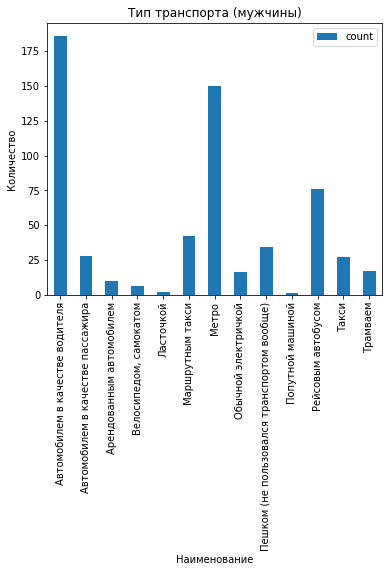

In [727]:
gender_vs_auto_man_copy = gender_vs_auto_man.copy()
gender_vs_auto_man_copy.rename(columns={'Количество':'count'}).sort_values('count', ascending=False)
gender_vs_auto_man_copy.plot(kind='bar', title='Тип транспорта (мужчины)', ylabel='Количество',
         xlabel='Наименование', figsize=(6, 5))

# gender_vs_auto_man_copy

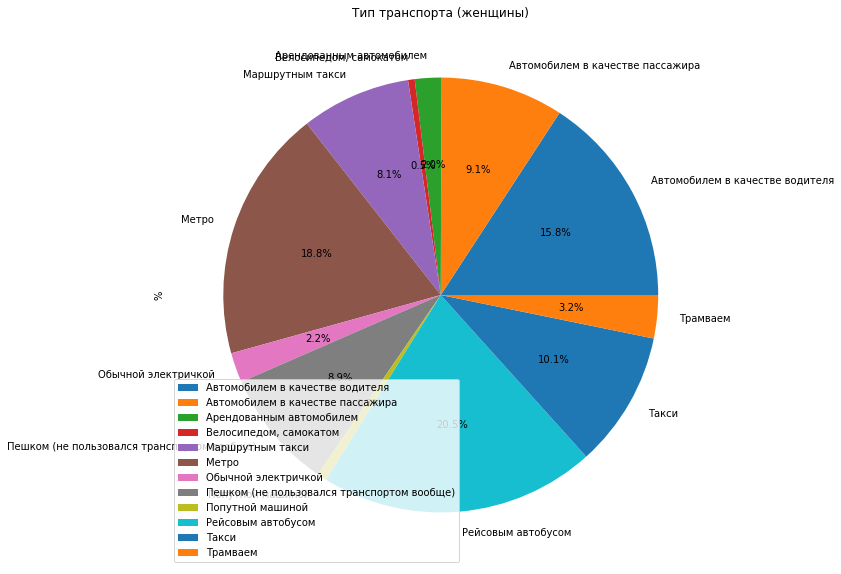

In [716]:
gender_vs_auto_woman.iloc[:,[1,2]].plot.pie(y=gender_vs_auto_woman.columns[2], figsize=(10,10),autopct='%1.1f%%')
plt.title('Тип транспорта (женщины)')
plt.ylabel('%')
plt.show()

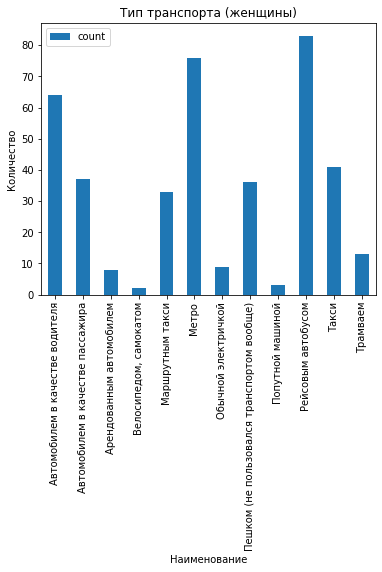

In [729]:
gender_vs_auto_woman_copy = gender_vs_auto_woman.copy()
gender_vs_auto_woman_copy.rename(columns={'Количество':'count'}).sort_values('count', ascending=False)
gender_vs_auto_woman_copy.plot(kind='bar', title='Тип транспорта (женщины)', ylabel='Количество',
         xlabel='Наименование', figsize=(6, 5))